# Chapter 5 Assignment

In [ ]:
## Preparing the note book
import sys
assert sys.version_info >= (3, 5)


import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import os


np.random.seed(42)


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. What is the fundamental idea behind Support Vector Machines?

The innate idea for Support Vector Machines is to fit the widest possible “street” between the classes. Looking at the  iris dataset, the two classes can be clearly separated easily plotting a straight line. The decision boundary of the model, which is depicted by the dashed line, is so terrible that it even fails to appropriately split the classes. However, because their decision bounds are so near to the examples, the other two models do not perform as well on fresh instances as they do on this training set.

In contrast, the decision boundary of an SVM classifier keeps a minimum distance from the nearest training instances while still separating the two classes. Additionally, the SVM looks for a balance between having the widest possible street and perfectly separating the two groups when doing soft margin classification. Using kernels for training on nonlinear datasets is another important concept.


# 2. What is a support vector?

A Support Vector Machine (SVM) is a strong and adaptable Machine Learning model that can do regression, outlier detection, and linear or nonlinear classification.

When using the SVM, each data point is represented as a point in n-dimensional space (where n is the number of features you have), with each feature's value being the value of a certain coordinate. Then, we carry out classification by identifying the hyper-plane that effectively distinguishes the two classes.

Once training an SVM is done, a support vector is any instance located on the “street”, including its border. The decision boundary is entirely determined by the support vectors. 

# 3. Why is it important to scale the inputs when using SVMs?

SVMs are very sensitive to scaling and it would try to fit the largest possible “street” between the classes, so if the training set is not scaled, the SVM will tend to neglect small features.

# 4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

SVM classifier can output the distance between the test instance and the decision boundary, and this can be used as a confidence score. However, this score cannot be converted directly into an estimation of the class probability. If the probability is set to true when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() methods to the SVM.

SVM classifiers do not output probabilities for each class.




# 5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?

The Primal form of SVM problem should be used instead of the Dual form.

Because the kernelized SVMs can only employ the dual form, this only pertains to linear SVMs. The number of training examples, m, determines the computational difficulty of the SVM problem's primal form, whereas the number between m2 and m3 determines the computational complexity of the dual form. Therefore, because the dual form will be considerably too slow if there are millions of instances, the primal form is preferable.

# 6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?

If an SVM classifier trained with an RBF kernel underfits the training set, it is very possible that the regularization might be too much. In order to decrease it, you will need to increase gamma or C (or both of them).

# 7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?

The QP parameters for the hard margin problem H′, f′, A′, and b′. 
The QP parameters for the soft margin problem have m additional parameters (np = n + 1 + m) and m additional constraints (nc = 2m). They can be defined like so:
• H is equal to H′, plus m columns of 0s on the right and m rows of 0s at the
bottom: H =
H′ 0 ⋯
0 0
⋮ ⋱
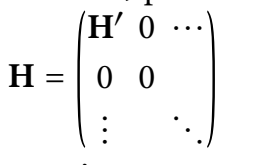

• f is equal to f′ with m additional elements, all equal to the value of the hyperparameter C.
• b is equal to b′ with m additional elements, all equal to 0.
• A is equal to A′, with an extra m × m identity matrix Im appended to the right,
–*I*m just below it, and the rest filled with 0s: A =
A′ Im
0 −Im

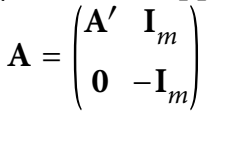

# 8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.


In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)


In [ ]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# 9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binaryclassifiers, you will need to use one-versus-the-rest to classify all 10 digits. Youmay want to tune the hyperparameters using small validation sets to speed up theprocess. What accuracy can you reach?


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

In [ ]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

# 10. Exercise: train an SVM regressor on the California housing dataset.

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

In [ ]:
np.sqrt(mse)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)